In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [7]:
# Read the data
data = pd.read_csv("/Users/sameerbhatt/Downloads/vw_ChurnData.csv")

# Display the first few rows of the fetched data
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11472-PUN,Female,33,No,Punjab,8,6,Deal 5,Yes,No,...,Bank Withdrawal,55.40,55.40,0.00,0,13.01,68.41,Churned,Competitor,Competitor had better devices
1,11543-WES,Female,35,Yes,West Bengal,0,7,NaN,Yes,No,...,Bank Withdrawal,49.40,874.80,0.00,0,375.48,1250.28,Churned,Other,Deceased
2,11965-BIH,Female,38,Yes,Bihar,4,21,Deal 3,Yes,Yes,...,Credit Card,-8.00,3204.65,35.82,110,1074.24,4353.07,Churned,Competitor,Competitor made better offer
3,12016-TAM,Female,57,Yes,Tamil Nadu,0,9,Deal 5,Yes,No,...,Mailed Check,20.05,164.85,0.00,0,337.54,502.39,Churned,Other,Moved
4,12079-MAH,Female,73,Yes,Maharashtra,2,4,NaN,Yes,No,...,Bank Withdrawal,79.90,260.90,0.00,0,8.94,269.84,Churned,Price,Price too high


## Data Preprocessing


In [8]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [9]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,33,No,Punjab,8,6,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,55.40,55.40,0.00,0,13.01,68.41,Churned
1,Female,35,Yes,West Bengal,0,7,NaN,Yes,No,Yes,...,Month-to-Month,No,Bank Withdrawal,49.40,874.80,0.00,0,375.48,1250.28,Churned
2,Female,38,Yes,Bihar,4,21,Deal 3,Yes,Yes,Yes,...,Month-to-Month,Yes,Credit Card,-8.00,3204.65,35.82,110,1074.24,4353.07,Churned
3,Female,57,Yes,Tamil Nadu,0,9,Deal 5,Yes,No,No,...,Month-to-Month,No,Mailed Check,20.05,164.85,0.00,0,337.54,502.39,Churned
4,Female,73,Yes,Maharashtra,2,4,NaN,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,79.90,260.90,0.00,0,8.94,269.84,Churned


In [10]:
#List of columns to be label encoded
columns_to_encode = [
    'Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type', 
    'Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies', 
    'Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method'
]

#Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

#Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})



In [20]:
data.head(10)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,33,0,15,8,6,4,1,0,1,...,0,1,0,55.40,55.40,0.00,0,13.01,68.41,1
1,0,35,1,21,0,7,5,1,0,1,...,0,0,0,49.40,874.80,0.00,0,375.48,1250.28,1
2,0,38,1,2,4,21,2,1,1,1,...,0,1,1,-8.00,3204.65,35.82,110,1074.24,4353.07,1
3,0,57,1,17,0,9,4,1,0,0,...,0,0,2,20.05,164.85,0.00,0,337.54,502.39,1
4,0,73,1,12,2,4,5,1,0,1,...,0,1,0,79.90,260.90,0.00,0,8.94,269.84,1
5,0,23,0,17,7,3,1,1,1,1,...,1,0,0,85.55,5084.65,0.00,0,407.69,5492.34,1
6,0,66,1,7,7,26,4,1,1,1,...,0,1,0,84.50,453.75,0.00,0,184.40,638.15,1
7,0,38,1,0,15,2,3,1,1,1,...,1,0,2,77.50,1625.00,18.39,80,368.97,2055.58,1
8,1,28,0,12,11,8,3,1,1,1,...,0,1,1,58.60,939.70,0.00,0,221.85,1161.55,1
9,0,52,0,2,5,34,3,1,0,1,...,0,1,0,54.20,1152.70,0.00,0,599.28,1751.98,1


In [12]:
#Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

 
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ## Train Random Forest Model

In [13]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[347]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       347

    accuracy                           1.00       347
   macro avg       1.00      1.00      1.00       347
weighted avg       1.00      1.00      1.00       347



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


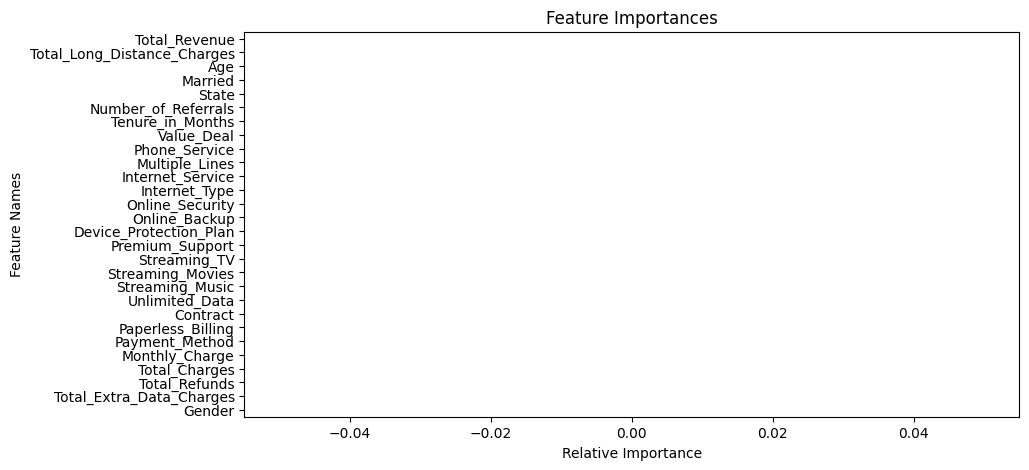

In [19]:
# Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

 
# Plot the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


